In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


# **1. RAVDESS dataset**


In [2]:
# Loading RAVDESS Dataset ====================================================

RAV = "../dataset/ravdess/Audio_Speech_Actors_01-24"

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + '/' + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + '/' + i + '/' + f)
        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] = RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_surprise       96
male_disgust        96
male_happy          96
male_angry          96
male_fear           96
male_sad            96
female_disgust      96
female_sad          96
female_fear         96
female_surprise     96
female_happy        96
female_angry        96
Name: labels, dtype: int64

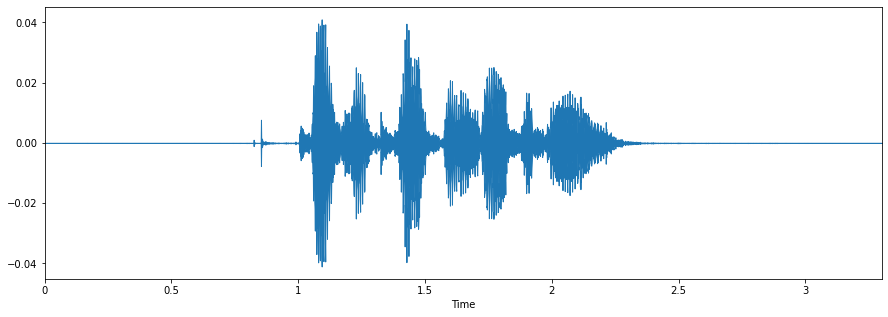

In [3]:
# Exploring the data ..

# Pick a fearful track
fname = RAV + '/Actor_01/03-01-01-01-01-01-01.wav'
#fname = 'test.wav'  
#path = '/home/ubuntu/hy.cheng/code/nlp/0424/dataset/AudioData/'
#fname = path + '/DC/a01.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)


# **2. SAVEE dataset**

In [4]:
# Exploring SAVEE Dataset ======================================================

SAVEE = "../dataset/savee/AudioData"

dir_list = os.listdir(SAVEE)
dir_list.sort()

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    fname = os.listdir(SAVEE + '/' + i)
    for f in fname:
      if f[0]=='a':
          emotion.append('male_angry')
      elif f[0]=='d':
          emotion.append('male_disgust')
      elif f[0]=='f':
          emotion.append('male_fear')
      elif f[0]=='h':
          emotion.append('male_happy')
      elif f[0]=='n':
          emotion.append('male_neutral')
      elif f[0:2]=='sa':
          emotion.append('male_sad')
      elif f[0:2]=='su':
          emotion.append('male_surprise')
      else:
          emotion.append('male_error')
      path.append(SAVEE + '/' + i + '/' + f)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_surprise     60
male_happy        60
male_disgust      60
male_fear         60
male_angry        60
male_sad          60
Name: labels, dtype: int64

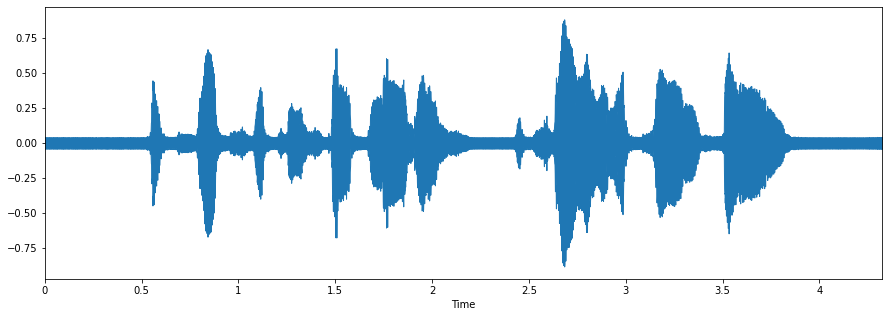

In [5]:
# Exploring the data ..

fname = SAVEE + '/DC/f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

# **Saving meta-data**

In [8]:
df = pd.concat([SAVEE_df, RAV_df], axis = 0)
print(df.labels.value_counts())

df.to_csv("../dataset/audio_data_path.csv",index=False)
print(df.head())
print(df.tail())


male_neutral       264
male_surprise      156
male_happy         156
male_disgust       156
male_fear          156
male_angry         156
male_sad           156
female_neutral     144
female_disgust      96
female_sad          96
female_fear         96
female_surprise     96
female_happy        96
female_angry        96
Name: labels, dtype: int64
          labels source                                    path
0  male_surprise  SAVEE  ../dataset/savee/AudioData/DC/su02.wav
1     male_happy  SAVEE   ../dataset/savee/AudioData/DC/h07.wav
2     male_happy  SAVEE   ../dataset/savee/AudioData/DC/h14.wav
3   male_disgust  SAVEE   ../dataset/savee/AudioData/DC/d02.wav
4   male_disgust  SAVEE   ../dataset/savee/AudioData/DC/d11.wav
               labels   source  \
1435     female_happy  RAVDESS   
1436   female_neutral  RAVDESS   
1437  female_surprise  RAVDESS   
1438     female_happy  RAVDESS   
1439     female_happy  RAVDESS   

                                                   path  
1435